# Part - 1

In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [40]:
df_wine = load_wine()

In [41]:
df_wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [42]:
df_wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [43]:
X = df_wine.data
y = df_wine.target

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 45)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  92.59 %


In [46]:
# Pruning Strategy - 1 
# Limiting the maximum depth of tree using max_depth = 3

clf1 = DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                #   ,min_samples_leaf=10
                                #   ,min_samples_split=25
                             )
clf1 = clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  96.30 %


In [47]:
# Pruning Strategy - 1 
# Limiting the maximum depth of tree using max_depth = 4

clf2 = DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=4
                                #   ,min_samples_leaf=10
                                #   ,min_samples_split=25
                             )
clf2 = clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  98.15 %


In [48]:
# Pruning Strategy - 2
# Using min_samples_leaf = 10

clf3 = DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                    ,min_samples_leaf=10
                                  # ,min_samples_split=25
                             )
clf3 = clf3.fit(X_train, y_train)

y_pred = clf3.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  96.30 %


In [49]:
# Pruning Strategy - 2
# Using min_samples_leaf = 20

clf4 = DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=4
                                    ,min_samples_leaf=20
                                  # ,min_samples_split=25
                             )
clf4 = clf4.fit(X_train, y_train)

y_pred = clf4.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  85.19 %


In [50]:
# Pruning Strategy - 3
# Using min_samples_split = 5

clf5 = DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=4
                                    ,min_samples_leaf=10
                                    ,min_samples_split=5
                             )
clf5 = clf5.fit(X_train, y_train)

y_pred = clf5.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  94.44 %


In [51]:
# Pruning Strategy - 3
# Using min_samples_split = 15

clf6 = DecisionTreeClassifier(criterion="entropy"
                                    ,random_state=30
                                    ,splitter="random"
                                    ,max_depth=3
                                    ,min_samples_leaf=20
                                    ,min_samples_split=15
                             )
clf6 = clf6.fit(X_train, y_train)

y_pred = clf6.predict(X_test)

accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")

Accuracy:  85.19 %


### For me, Limiting the Maximum Depth of the Tree worked better as a Pruning Strategy

# Part - 2

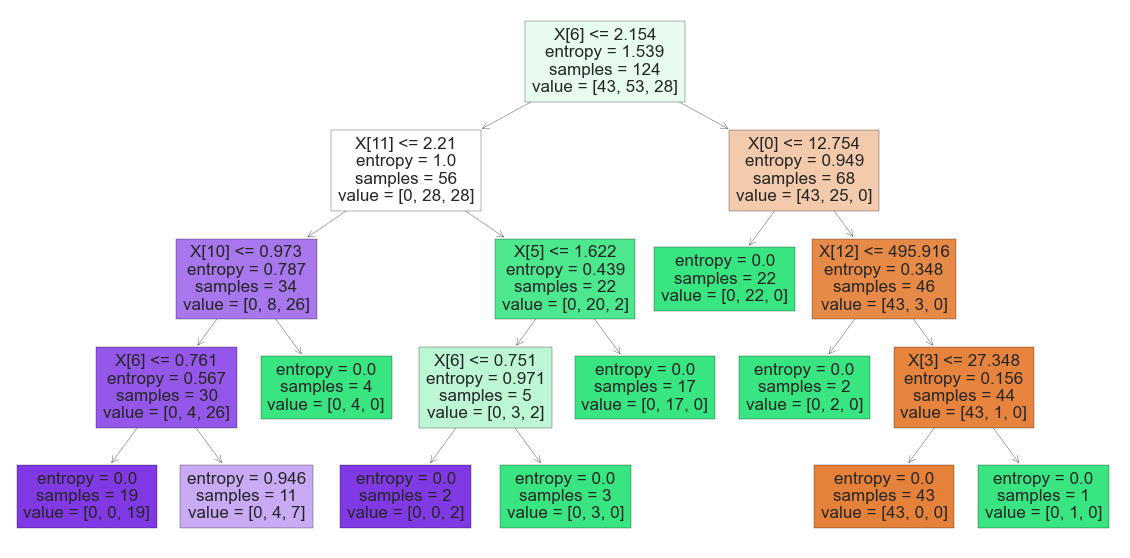

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(20, 10))
plot_tree(clf2, filled = True)
plt.show()

In [53]:
clf2.feature_importances_

array([0.26896511, 0.        , 0.        , 0.03816792, 0.        ,
       0.02668571, 0.45304867, 0.        , 0.        , 0.        ,
       0.05414001, 0.1084725 , 0.05052007])

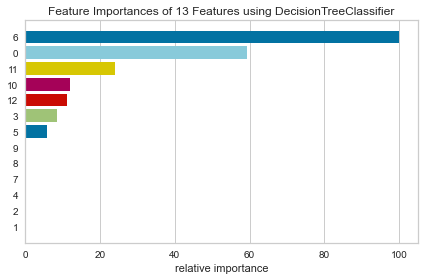

<AxesSubplot:title={'center':'Feature Importances of 13 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [54]:
from yellowbrick.model_selection import FeatureImportances

feature_importances = FeatureImportances(clf2)
feature_importances.fit(X, y)
feature_importances.show()